In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '../data/processed/cleaned_insurance_data.csv'
df = pd.read_csv(data_path)

# Display first few rows
df.head()


,Age,Gender,Driving_Experience,Vehicle_Type,Previous_Accidents,Region,Annual_Mileage,Premium,Accident
0,56,1,38,3,0,1,18524.705332,358.826955,0
1,69,0,52,2,0,1,6495.821865,601.053844,1
2,46,1,27,0,0,1,11184.105493,603.559907,0
3,32,1,16,1,0,0,19590.905892,656.446490,1
4,60,0,43,0,1,1,18183.213256,589.389243,0


## Statistical Summary for Numerical Variables

In [23]:

# Statistical summary
df.describe()


,Age,Gender,Driving_Experience,Vehicle_Type,Previous_Accidents,Region,Annual_Mileage,Premium,Accident
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000
mean,49.322594,0.498590,31.340516,0.997584,0.090818,0.498993,15077.903563,499.692013,0.664116
std,18.189089,0.500048,18.243818,0.993227,0.287378,0.500049,4797.400386,99.981256,0.472346
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.000000,200.000000,0.000000
25%,34.000000,0.000000,16.000000,0.000000,0.000000,0.000000,11689.129126,431.429991,0.000000
50%,50.000000,0.000000,31.000000,1.000000,0.000000,0.000000,15067.255906,500.043976,1.000000
75%,65.000000,1.000000,47.000000,2.000000,0.000000,1.000000,18411.977035,568.103525,1.000000
max,80.000000,1.000000,64.000000,3.000000,1.000000,1.000000,29459.476170,799.190688,1.000000


## Histograms and Density Plots for Numerical Variables

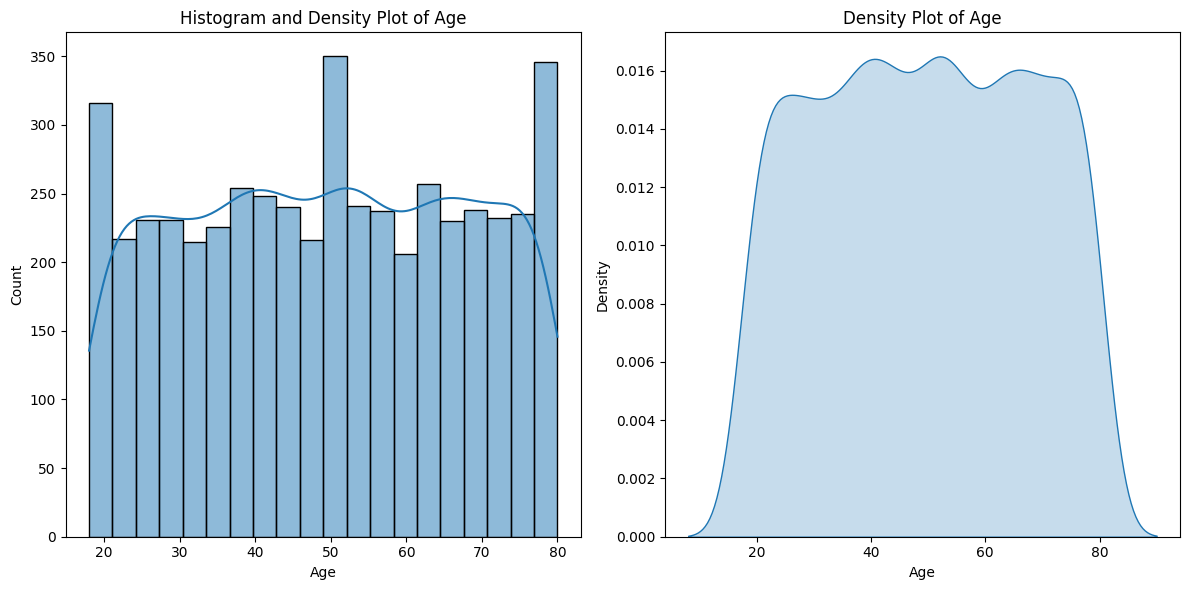

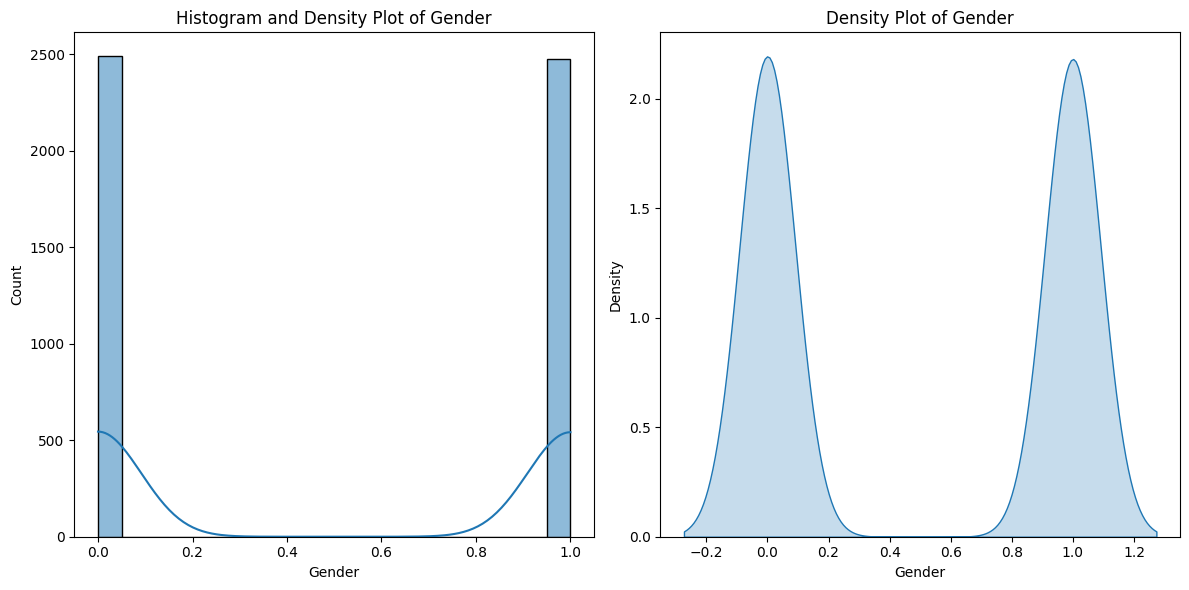

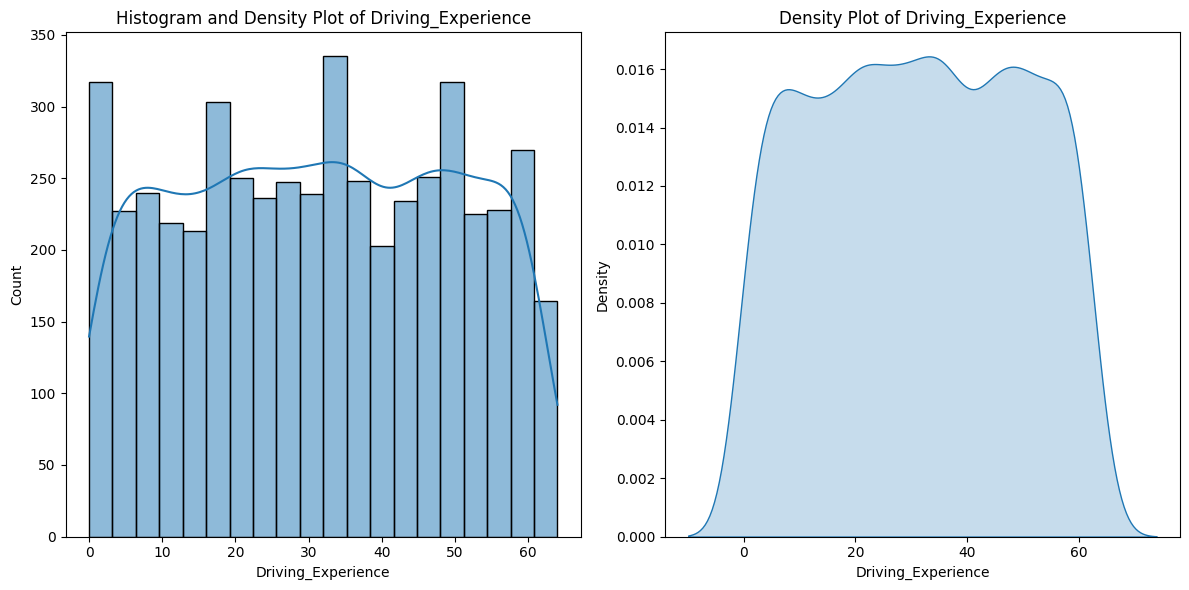

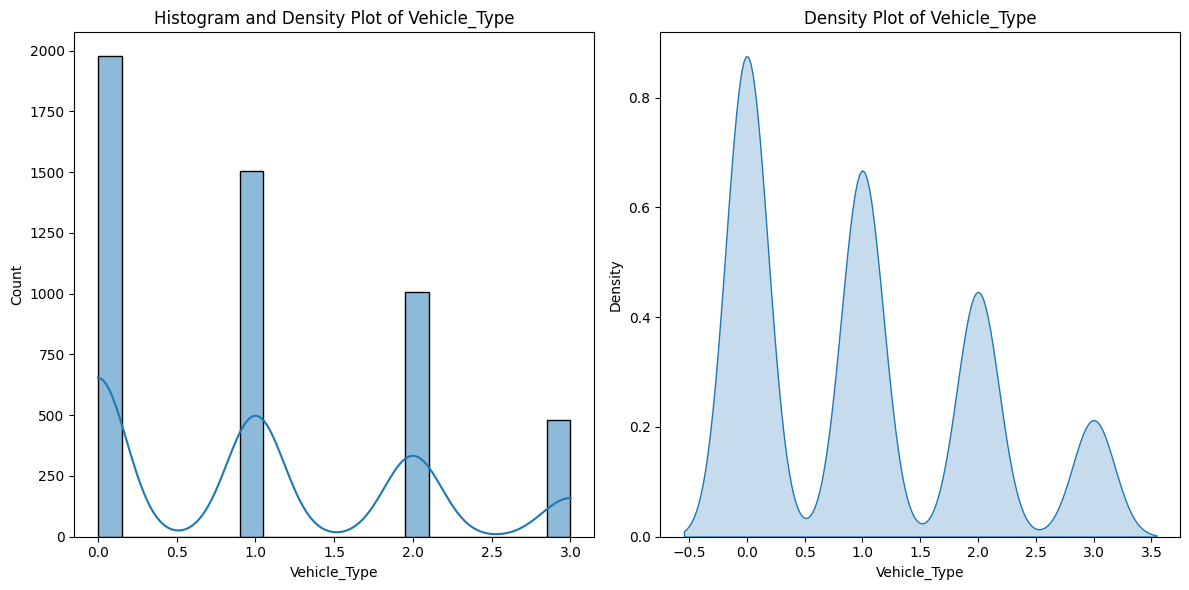

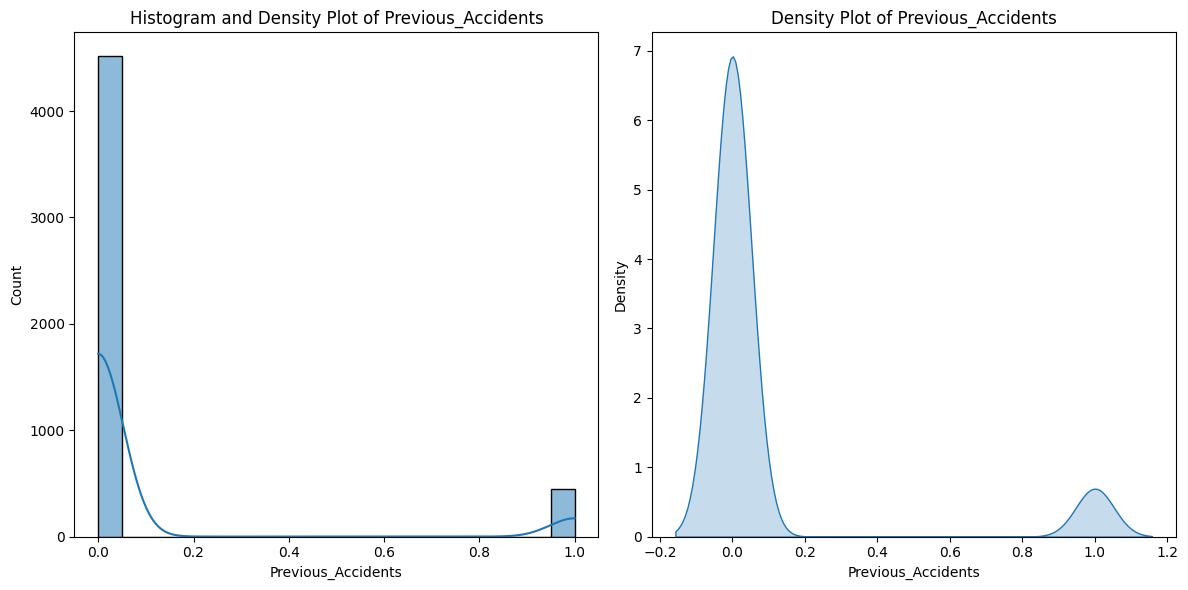

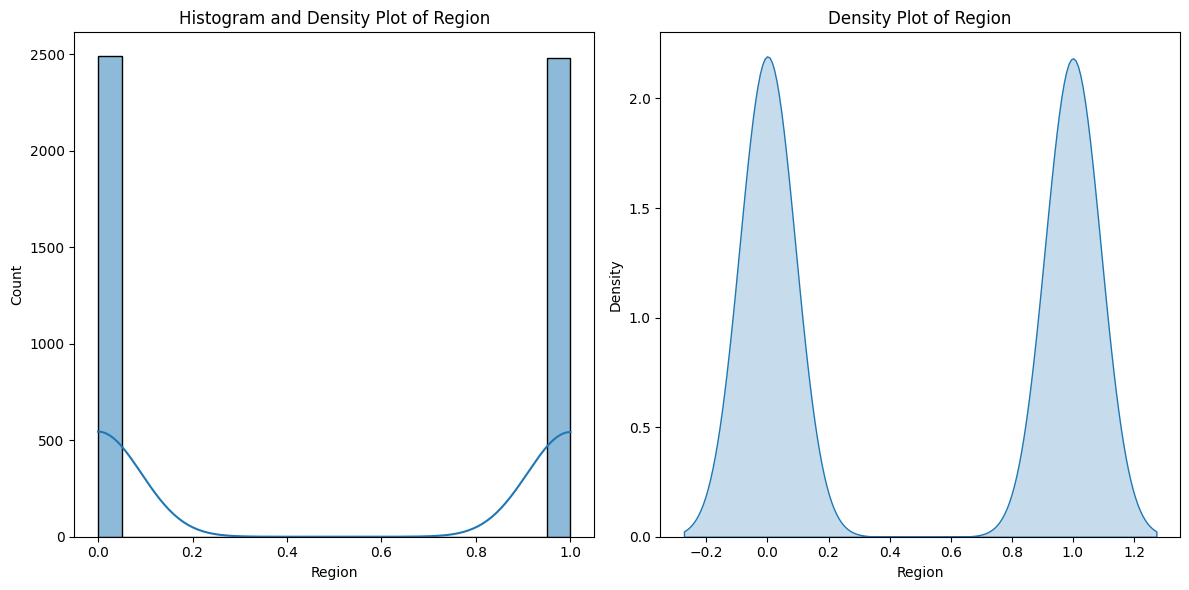

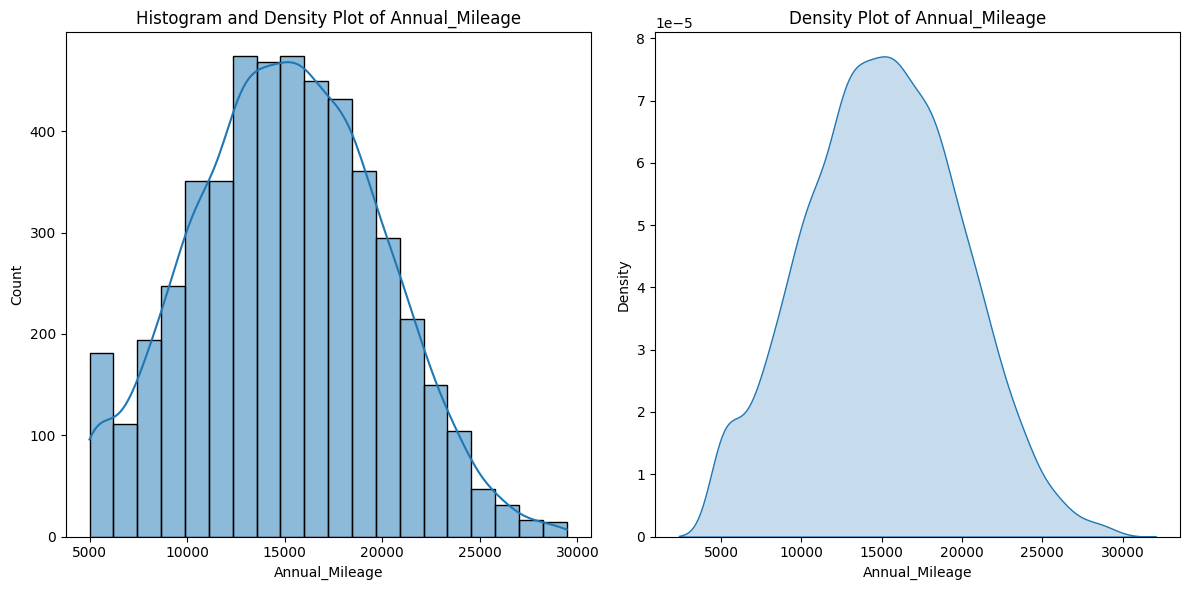

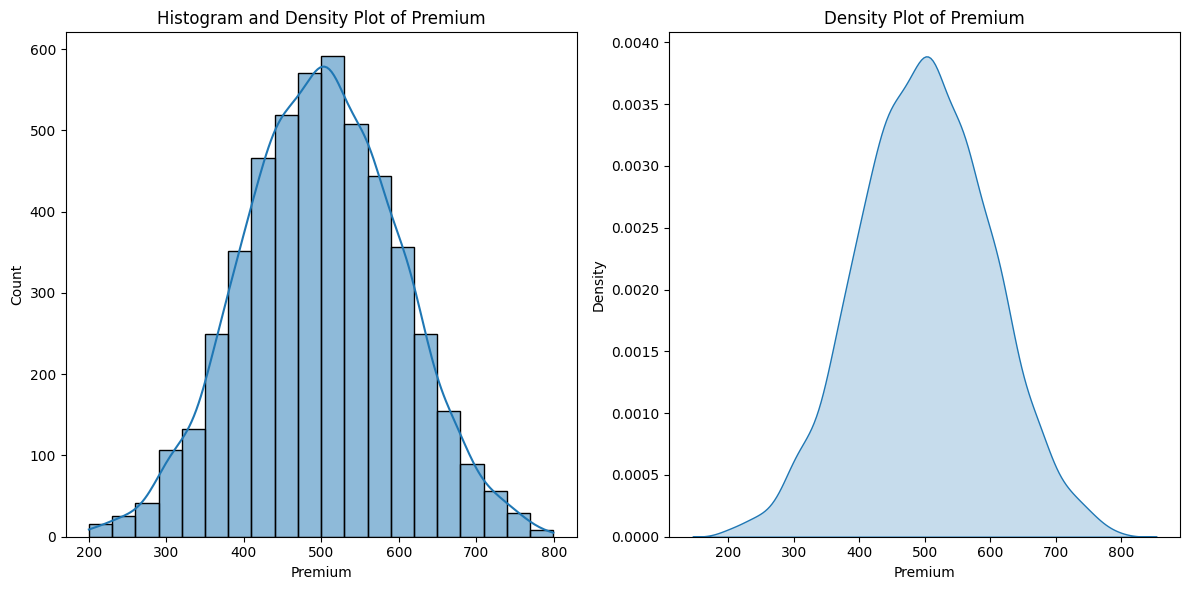

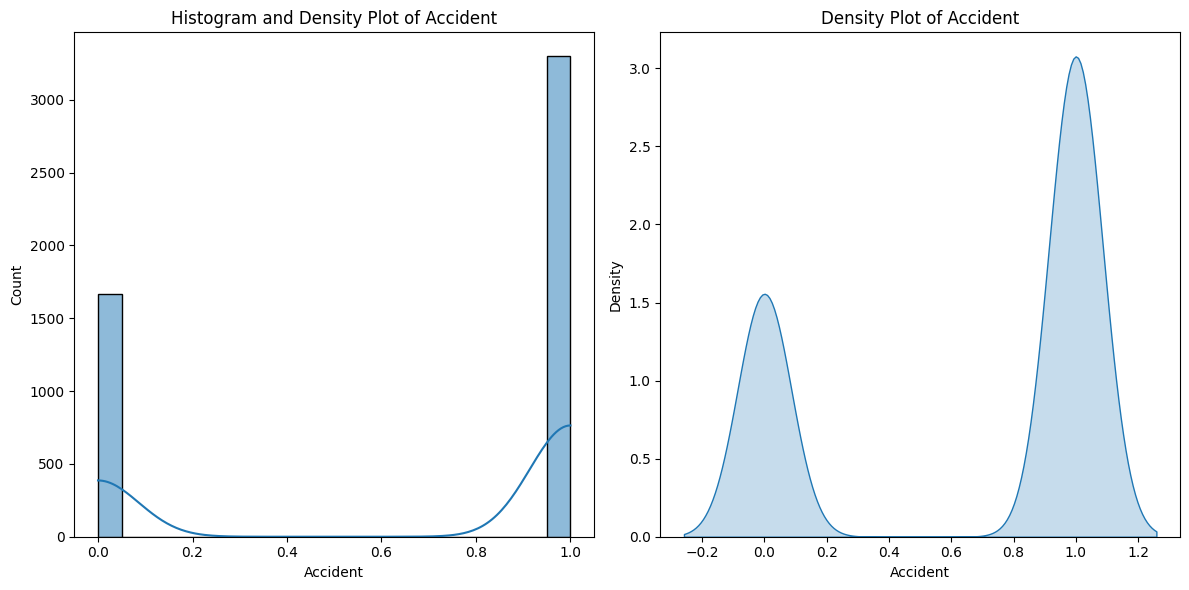

In [24]:

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, edgecolor='k')
    plt.title(f'Histogram and Density Plot of {col}')
    plt.xlabel(col)

    plt.subplot(1, 2, 2)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


## Frequency Distributions for Categorical Variables

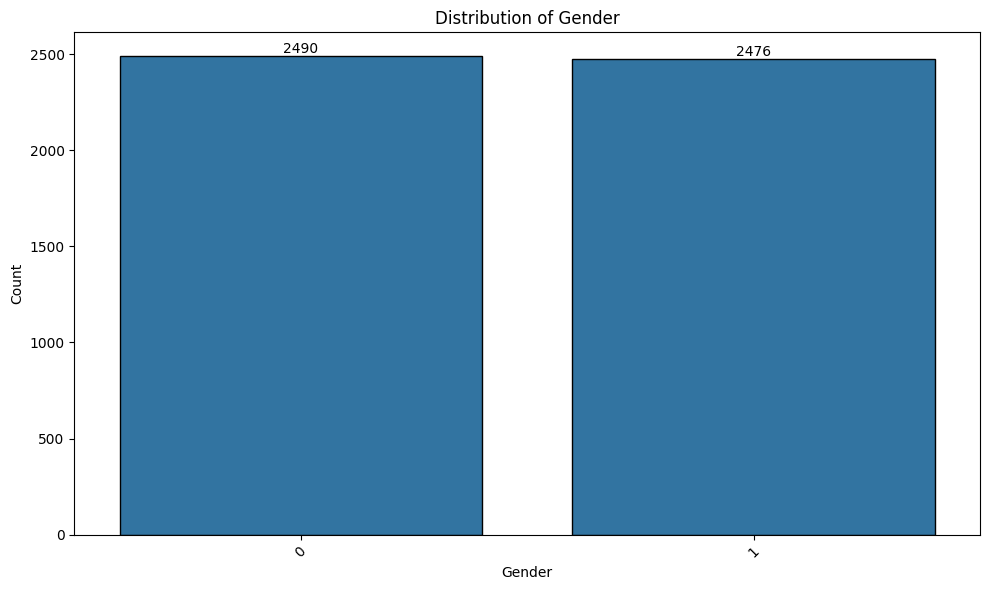

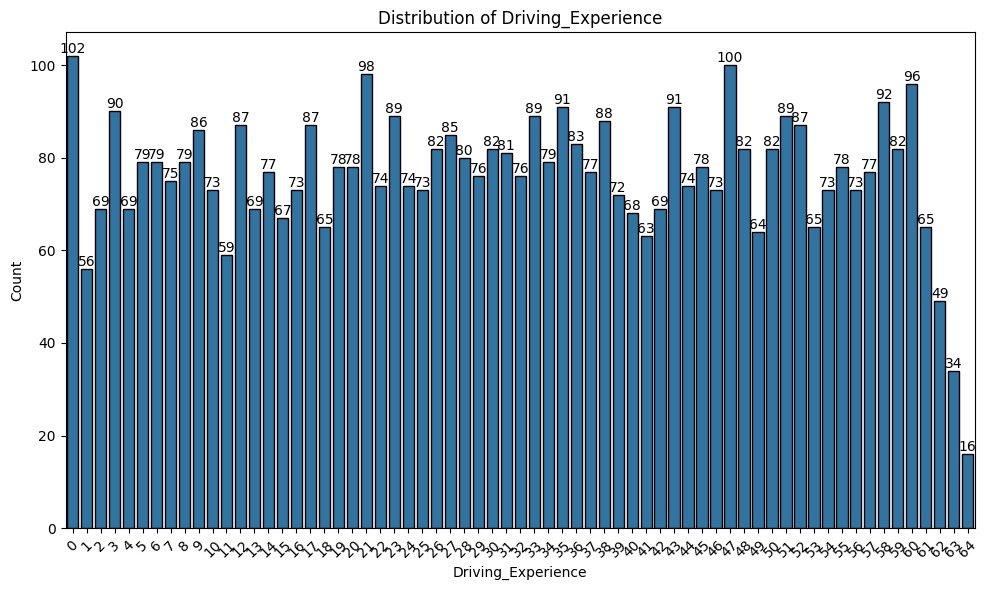

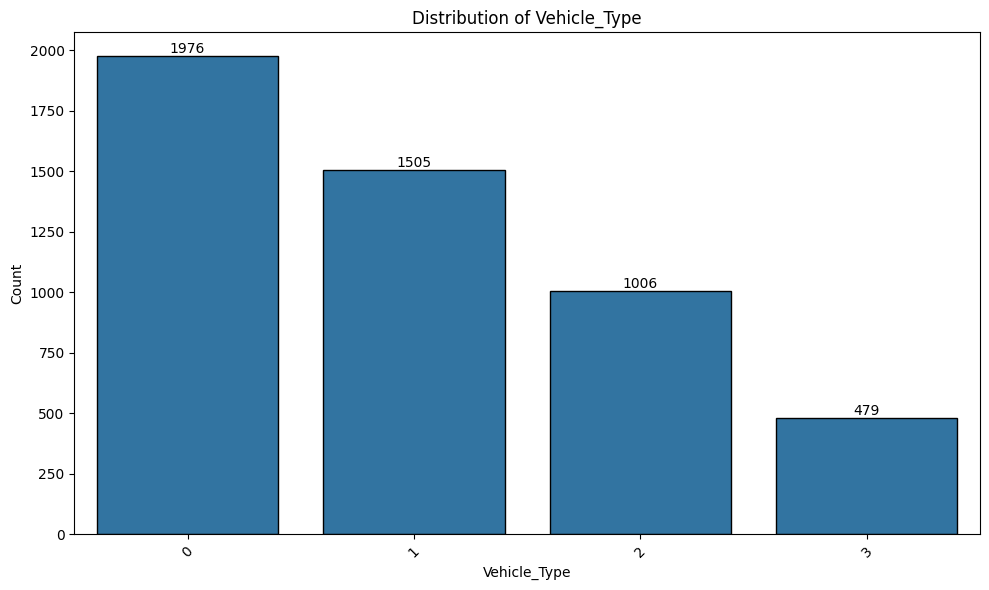

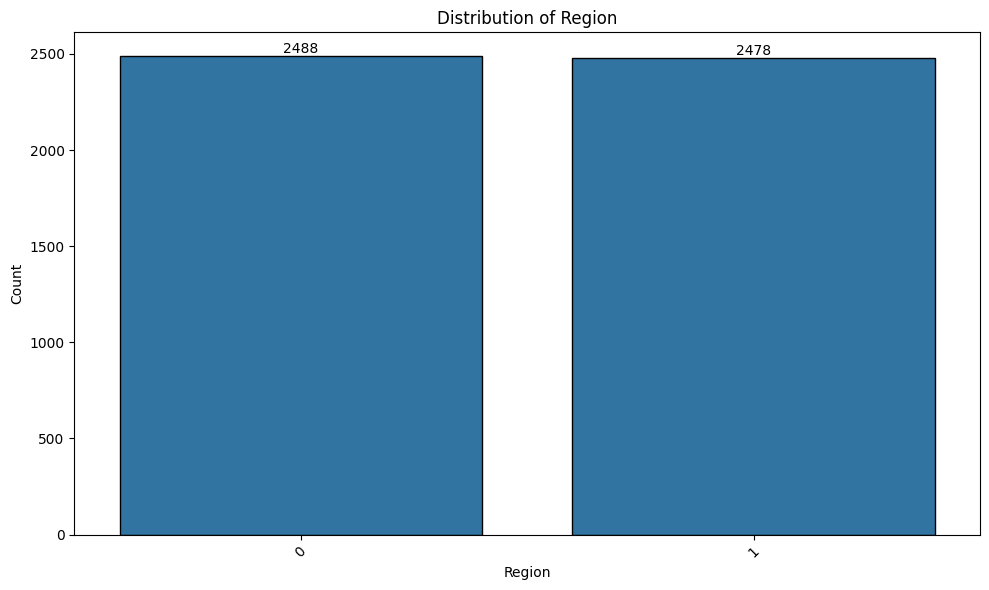

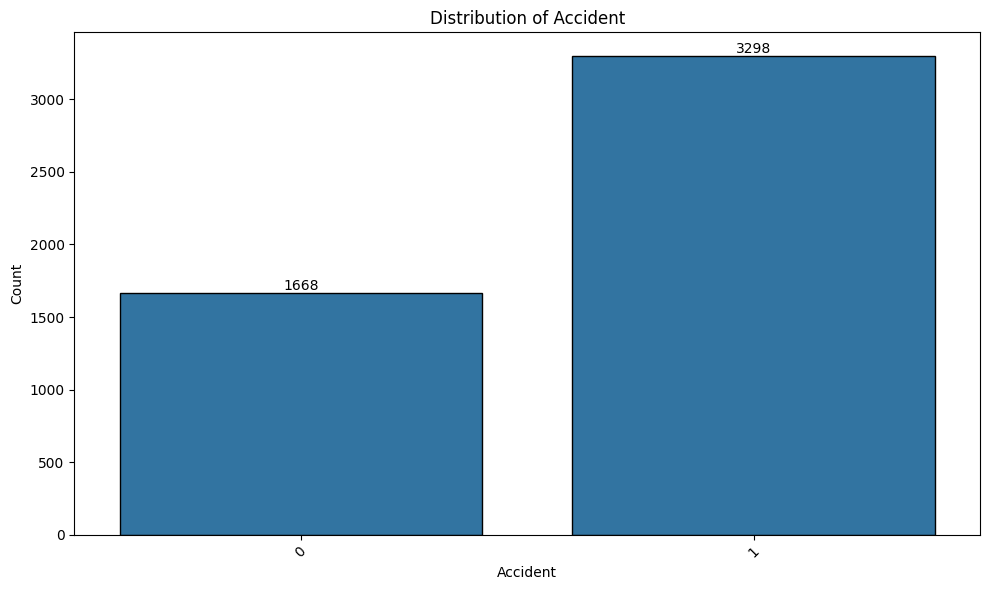

In [25]:

# Explicitly define categorical columns
categorical_columns = ['Gender', 'Driving_Experience', 'Vehicle_Type', 'Region', 'Accident']

# Convert to category type
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Create bar plots
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=col, edgecolor='k')
    
    # Add value labels on top of bars
    for container in ax.containers:
        ax.bar_label(container)
    
    # Rotate x-labels if needed
    plt.xticks(rotation=45)
    
    # Add title and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()


## Additional Statistical Analysis

In [26]:

# Define numerical columns explicitly
numerical_columns = ['Age', 'Previous_Accidents', 'Annual_Mileage', 'Premium']

# Mean, median, mode, and standard deviation for numerical columns only
for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().iloc[0]
    std_dev = df[col].std()
    
    print(f"{col}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Mode: {mode:.2f}")
    print(f"  Standard Deviation: {std_dev:.2f}\n")

# For categorical columns, show value counts instead
print("\nCategorical Variables Summary:\n")
categorical_columns = ['Gender', 'Driving_Experience', 'Vehicle_Type', 'Region', 'Accident']
for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())
    print(f"Mode: {df[col].mode().iloc[0]}\n")
    print("-" * 50)


Age:
  Mean: 49.32
  Median: 50.00
  Mode: 52.00
  Standard Deviation: 18.19

Previous_Accidents:
  Mean: 0.09
  Median: 0.00
  Mode: 0.00
  Standard Deviation: 0.29

Annual_Mileage:
  Mean: 15077.90
  Median: 15067.26
  Mode: 5000.00
  Standard Deviation: 4797.40

Premium:
  Mean: 499.69
  Median: 500.04
  Mode: 200.00
  Standard Deviation: 99.98


Categorical Variables Summary:


Gender Distribution:
Gender
0    2490
1    2476
Name: count, dtype: int64
Mode: 0

--------------------------------------------------

Driving_Experience Distribution:
Driving_Experience
0     102
47    100
21     98
60     96
58     92
     ... 
11     59
1      56
62     49
63     34
64     16
Name: count, Length: 65, dtype: int64
Mode: 0

--------------------------------------------------

Vehicle_Type Distribution:
Vehicle_Type
0    1976
1    1505
2    1006
3     479
Name: count, dtype: int64
Mode: 0

--------------------------------------------------

Region Distribution:
Region
0    2488
1    2478
Name